# Midterm (Notebook 1 of 2)
## Carolyn Chu and Leslie Velasquez

This notebook is for the 206a midterm. Section 1 explores Census Income Data, Section 2 explores and overlays LA Park Data, Section 3 combines this with Neighborhood Data, and Section 4 conducts a spatial join to look at how many parks per neighborhood. The research question for our project is, "Where do we need more parks in LA?"

This notebook looks at Census Reporter Income Data, LA Park Data, and LA County Neighborhood Data.


## Section 1: Census Income Data

Data comes from censusreporter.org's "Median Household Income in the Past 12 Months (in 2019 Inflation-adjusted Dollars)" from the American Community Survey 5-year estimates (2015-2019). 

We wanted to start with income data first to get a general sense of disparities in Los Angeles. We want to look at park provision at the opposite ends of the spectrum, meaning in the wealthiest communities and the poorest communities.

### Import Libraries and Data

In [1]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data
import plotly.express as px              # for interactive plots

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import median household income geojson data from censusreporter
hhinc = gpd.read_file('data/acs2019_5yr_medianincome.geojson')

### Preliminary exploration of the data
Here I will take a look at some basic information on the data and then rename the columns to more legible names.

In [3]:
# look at the datatypes
hhinc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B19013001         993 non-null    float64 
 3   B19013001, Error  990 non-null    float64 
 4   geometry          1005 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 39.4+ KB


In [4]:
# rename the third and fourth column to Median Household Income and Margin of Error
# refer to metadata for any clarification needed

hhinc.columns = ['geoid', 'name', 'Median Household Income', 'Margin of Error', 'geometry']

In [5]:
# look at first 5 rows
hhinc.head()

geoid                                   name  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA   

   Median Household Income  Margin of Error  \
0                  63534.0          16806.0   
1                  90389.0           9796.0   
2                  44083.0           9483.0   
3                  43713.0           4639.0   
4                  81776.0          11857.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

Everything looks good so far!

In [6]:
# look at last 5 rows
hhinc.tail()

geoid                                   name  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   
1004      16000US0644000                        Los Angeles, CA   

      Median Household Income  Margin of Error  \
1000                      NaN              NaN   
1001                      NaN              NaN   
1002                      NaN              NaN   
1003                      NaN              NaN   
1004                  62142.0            452.0   

                                               geometry  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  
1004  MULTIPOLYGON (((-118.66818 34.18987, -118.6681...

The last row is a summation/entry for all of LA. I need to drop this row!

In [7]:
#drop the last row
hhinc = hhinc.drop([1004])

Double check that the last row was dropped.

In [8]:
# look at last 5 rows
hhinc.tail()

geoid                                   name  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

      Median Household Income  Margin of Error  \
999                  150250.0          13582.0   
1000                      NaN              NaN   
1001                      NaN              NaN   
1002                      NaN              NaN   
1003                      NaN              NaN   

                                               geometry  
999   MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...

Excellent!

### Basic Statistics and Histogram

Now I'll get some basic stats and create a histogram to get a better sense of the data.

In [9]:
# get some basic statistics on median household income
hhinc['Median Household Income'].describe()

count       992.000000
mean      68203.515121
std       36642.300370
min        9191.000000
25%       42758.000000
50%       58398.500000
75%       85267.500000
max      250001.000000
Name: Median Household Income, dtype: float64

This is really helpful to get a sense of the spread. There are huge disparities with some census tracts having annual median household incomes over 250k. That's a lot of money! Additionally, the median income for all census tracts is around 58k. Let's visualize it!

<AxesSubplot:ylabel='Frequency'>

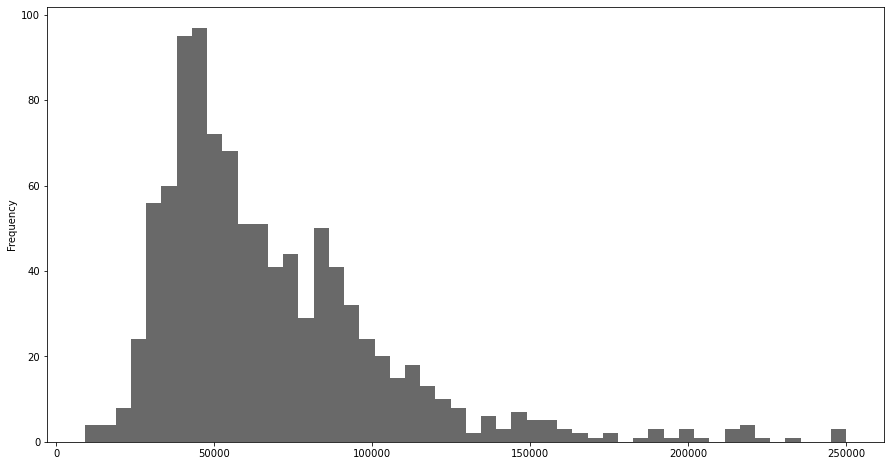

In [10]:
# create a histogram of median household incomes
hhinc['Median Household Income'].plot.hist(figsize=(15,8),
                                           bins=50,
                                           color='dimgray'
                                          )

### Map it!
Here I use geopandas and matplotlib to create a map of median household income quantiles.

<AxesSubplot:>

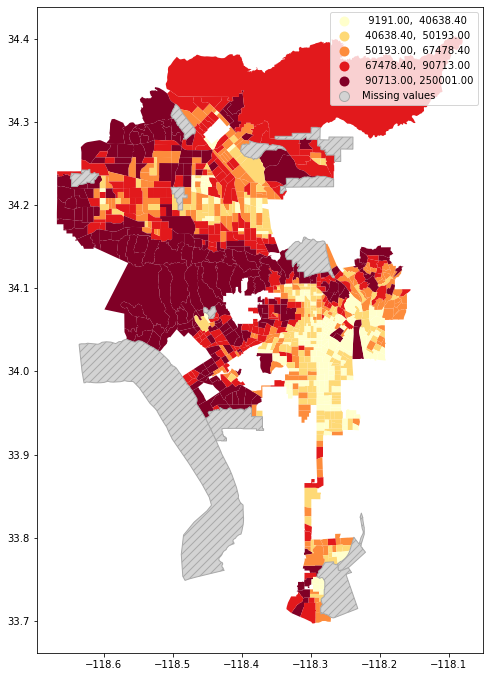

In [11]:
# using matplotlib, visualize the quantile data

hhinc.plot(figsize=(8,16),
                 column='Median Household Income',
                 legend=True, 
                 scheme='quantiles',
                 cmap='YlOrRd',
                 missing_kwds={
                     "color": "lightgrey",
                     "edgecolor": "darkgrey",
                     "hatch": "///",
                     "label": "Missing values"
                 }
          )

### Add a basemap so it's not floating in space
First reproject the dataframe, then add a basemap. I'll be projecting a few subsets of data, so I'm going to name these reprojected dataframes:
- "hhinc_allmercator" for the projected dataframe for all census tracts,
- "hhinc_merc" for the projected dataframe for the top 5 census tracts, and
- "hhinc_mercator" for the projected dataframe for the bottom 10 census tracts.

In [12]:
#reproject the dataframe
hhinc_allmercator = hhinc.to_crs(epsg=3857)

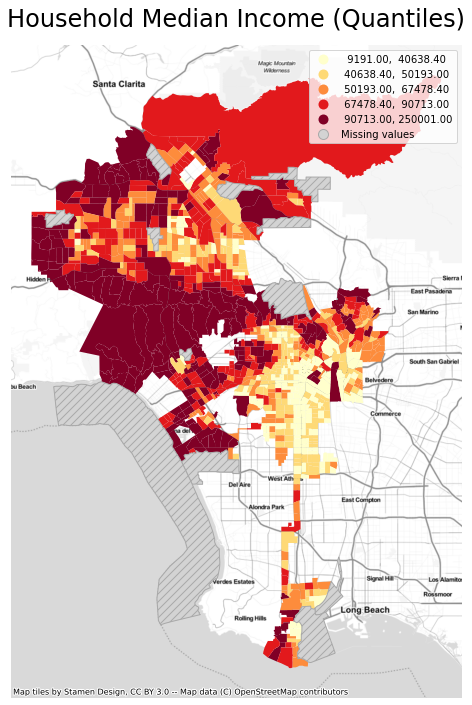

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument, meaning there's just one map
hhinc_allmercator.plot(ax=ax,
                    column='Median Household Income',
                    legend=True,
                    scheme='quantiles',
                    cmap='YlOrRd',
                    missing_kwds={
                        "color": "lightgrey", 
                        "edgecolor": "darkgrey", 
                        "hatch": "///",
                        "label": "Missing values"
                    }
                   )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Household Median Income (Quantiles)',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

### Census Tracts with Highest Median Household Incomes
This section is sorting the data in descending order, subsetting the data of just the top 5 tracts, then projecting it onto a map so it can be understood visually.

In [14]:
# sort from highest to lowest (descending) to find the census tracts with the highest median incomes
hhinc_descending = hhinc.sort_values(by='Median Household Income',ascending = False)

# check what the first 5 data rows look like
hhinc_descending[['geoid','Median Household Income']].head(5)

geoid  Median Household Income
831  14000US06037262303                 250001.0
832  14000US06037262400                 250001.0
340  14000US06037141700                 250001.0
994  14000US06037980019                 231250.0
833  14000US06037262501                 224962.0

In [15]:
# create a subset of the data with just these 5 entries
hhinc_topfive = hhinc_descending.head(5)
hhinc_topfive

geoid                                   name  \
831  14000US06037262303  Census Tract 2623.03, Los Angeles, CA   
832  14000US06037262400     Census Tract 2624, Los Angeles, CA   
340  14000US06037141700     Census Tract 1417, Los Angeles, CA   
994  14000US06037980019  Census Tract 9800.19, Los Angeles, CA   
833  14000US06037262501  Census Tract 2625.01, Los Angeles, CA   

     Median Household Income  Margin of Error  \
831                 250001.0              NaN   
832                 250001.0              NaN   
340                 250001.0              NaN   
994                 231250.0         117385.0   
833                 224962.0          24985.0   

                                              geometry  
831  MULTIPOLYGON (((-118.49599 34.07105, -118.4959...  
832  MULTIPOLYGON (((-118.52146 34.11764, -118.5214...  
340  MULTIPOLYGON (((-118.45322 34.13557, -118.4531...  
994  MULTIPOLYGON (((-118.59919 34.07436, -118.5991...  
833  MULTIPOLYGON (((-118.52914 34.04991, -118.5290...

In [16]:
#reproject this subset of data
#name it something different than the earlier dataframe so it doesn't get overwritten
hhinc_merc = hhinc_topfive.to_crs(epsg = 3857)

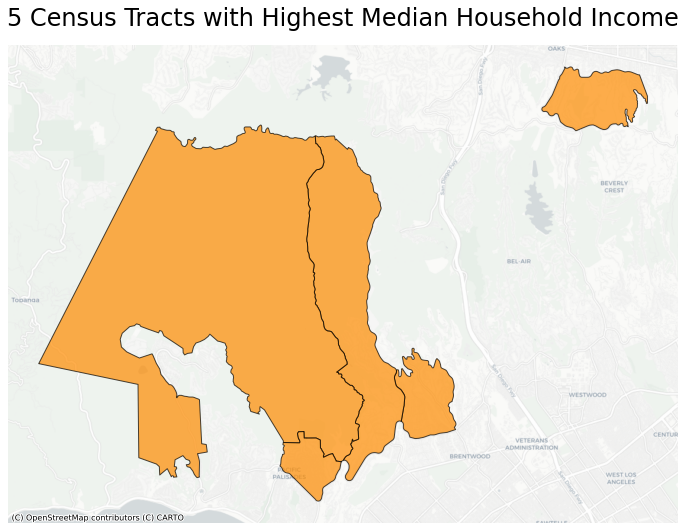

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
hhinc_merc.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('5 Census Tracts with Highest Median Household Income',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

What's striking about these top 5 census tracts is that they're all clustered in low density areas. You can see that "Topanga State Park" lightly in the background so it's easy to get a sense that a lot of these tracts are already wilderness or green space.

### Census Tracts with Lowest Median Household Incomes
This section sorts the data in ascending order so that I can subset the 10 census tracts with lowest median household income. I tried simply subsetting the tail of the descending dataset, but it was capturing null census tracts that made the data wonky.

Additionally, I chose to do 10 census tracts here (instead of 5 as I did in the previous section) because there weren't as many parks in this subset. Also, one census tract is Dodger Stadium (with no parks), some just didn't have many LA owned and managed parks, and others represented data skewed by the presence of UCLA and USC students. [Here's an interesting article that explains how college students skew income census data.](https://fivethirtyeight.com/features/inequality-in-college-towns/)

In [18]:
# sort ascending and check out the first 10 entries

hhinc_ascending = hhinc.sort_values(by='Median Household Income', ascending = True)
hhinc_ascending [['geoid','Median Household Income']].head(10)

geoid  Median Household Income
536  14000US06037206300                   9191.0
691  14000US06037222700                   9632.0
700  14000US06037224700                  11576.0
683  14000US06037221820                  12235.0
820  14000US06037242600                  16586.0
684  14000US06037221900                  17237.0
817  14000US06037242100                  18177.0
544  14000US06037207502                  18594.0
991  14000US06037980010                  19167.0
850  14000US06037265305                  20655.0

In [19]:
# create a subset of just those 10 entries
hhinc_bottomten = hhinc_ascending.head(10)

In [20]:
# reproject data frame
hhinc_mercator = hhinc_bottomten.to_crs(epsg=3857)

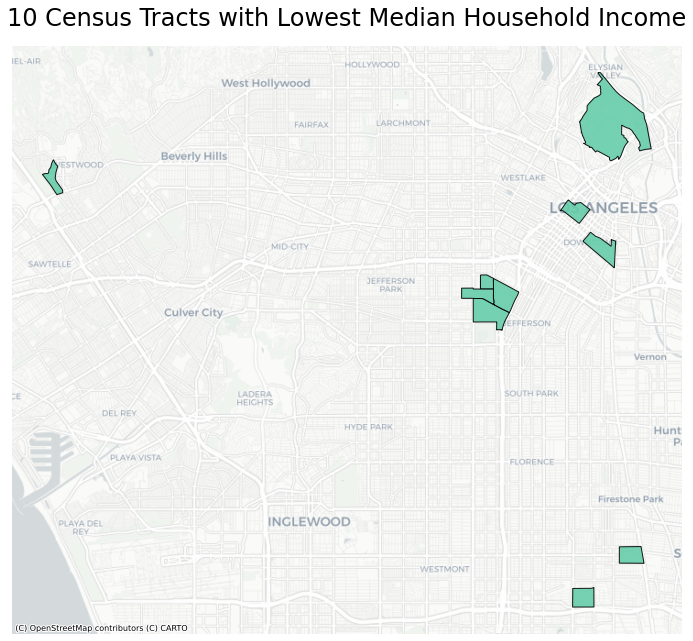

In [21]:
# map it

fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                  color="mediumaquamarine",
                  alpha=0.9,
                    edgecolor="black"
                 )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('10 Census Tracts with Lowest Median Household Income',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

These census tracts are more spread out across the city, unlike the highest median income tracts Based on the freeways, we can see that a couple are in the Watts neighborhood and Skid Row, a large one by Dodger Stadium, a cluster near USC, and a straggler near UCLA.

I'm going to combine the previous 2 maps into one for easier comparison.

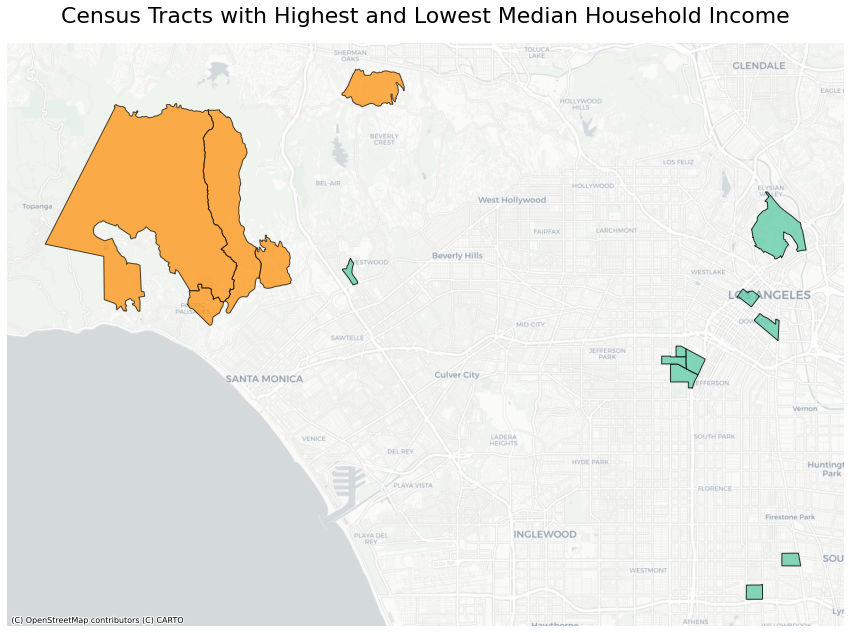

In [22]:
# map it
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                  color="mediumaquamarine",
                  alpha=0.8,
                    edgecolor="black"
                 )

hhinc_merc.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with Highest and Lowest Median Household Income',fontsize=22,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

I think this is a helpful visualization to understand the comparative sizes and clustering of these census tracts. It's clear that wealth is clustered in West LA while poorer census tracts are located in downtown and South LA. I also changed the basemap for more clarity.

## Section 2: Parks Data

Now this section will look at the parks data set from LA City's Open Data Portal. The dataset is called, "Recreation and Parks Information," and can be found [here](https://data.lacity.org/Parks-Recreation/Recreation-and-Parks-Information/rwq7-yhp5). I want to get a sense of the spread of parks, which I examine via the City Council districts. I'll also take a look at the geometry column and overlay this with the previous census tract data. In this section, I learned how to adjust the axes so I can just look at a certain portion of the data (which was very exciting when I figured it out).

## Import and Examine the Parks Data

In [23]:
#pull the parks data directly from the website link
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")

In [24]:
# explore the geodataframe more generally
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        561 non-null    object  
 1   shape_area  561 non-null    object  
 2   objectid    561 non-null    object  
 3   park_id     561 non-null    object  
 4   name_alpha  561 non-null    object  
 5   shape_leng  561 non-null    object  
 6   area_acres  561 non-null    object  
 7   issubpark   561 non-null    object  
 8   region      561 non-null    object  
 9   address     561 non-null    object  
 10  name_publi  330 non-null    object  
 11  park_class  561 non-null    object  
 12  cd_real     561 non-null    object  
 13  geometry    561 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 61.5+ KB


In [25]:
# look at first 5 rows
parks.head()

name     shape_area objectid park_id  \
0  Robert F Kennedy Inspiration Memorial Park  6501.37488025        1    1056   
1                         Sycamore Grove Park  691462.199493        2     736   
2                      San Pedro Welcome Park  17402.1579777        3     328   
3                  Country Club Heritage Park  3647.84860118        4    1045   
4                     Watts Cultural Crescent  128793.355722        5    1046   

                          name_alpha     shape_leng       area_acres  \
0  ROBERT F KENNEDY PARK (LAUSD) JUA   641.47054538   0.149251627315   
1                SYCAMORE GROVE PARK   6227.3991903    15.8738513625   
2             SAN PEDRO WELCOME PARK  560.372862441   0.399500174163   
3   COUNTRY CLUB PARK HERITAGE PLAZA  287.523337381  0.0837434158085   
4            WATTS CULTURAL CRESCENT  2852.11033344    2.95670043382   

  issubpark region                           address  \
0         N      M    3400 W Wilshire Blvd, LA 90010   
1         N      M      4702 N Figueroa St, LA 90042   
2         N      P  451 N Gaffey St, San Pedro 90731   
3         N      M        1015 S Wilton Pl, LA 90018   
4         N      P   1780 E Santa Ana Blvd, LA 90002   

                                          name_publi park_class cd_real  \
0  Kennedy (Robert F) Inspiration Memorial Park (...          N      10   
1                                Sycamore Grove Park          C      01   
2                              Formerly Welcome Park          N      15   
3                              AKA Wilton Place Park          N      10   
4                  AKA Watts Towers Cultural Cresent          N      15   

                                            geometry  
0  MULTIPOLYGON (((-118.29796 34.06162, -118.2969...  
1  MULTIPOLYGON (((-118.20110 34.10134, -118.2011...  
2  MULTIPOLYGON (((-118.29286 33.74600, -118.2928...  
3  MULTIPOLYGON (((-118.31504 34.05232, -118.3149...  
4  MULTIPOLYGON (((-118.24221 33.93945, -118.2422...

In [26]:
# look at last 5 rows
parks.tail()

name     shape_area  \
556                         Los Angeles River Greenway   132354.80071   
557                     South Palos Verdes Street Park  17682.6918121   
558                               Sunnynook River Park  41685.1517063   
559                         Los Angeles River Greenway  1342.83912884   
560  Los Angeles River Greenway / Elysian Valley Bi...  210126.738804   

    objectid park_id                                         name_alpha  \
556      558    1137  LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...   
557      568    1115                     SOUTH PALOS VERDES STREET PARK   
558      579    1093                               SUNNYNOOK RIVER PARK   
559      580    1138                      LAURELGROVE PEDESTRIAN BRIDGE   
560      582    1116  LOS ANGELES RIVER GREENWAY / ELYSIAN VALLEY BI...   

        shape_leng       area_acres issubpark region  \
556  6045.51423906    3.03846028767         Y      V   
557  548.042636013   0.405940370594         N      P   
558  1777.67071108   0.956963233412         Y      M   
559  332.093587483  0.0308274678654         Y      V   
560  27587.8415216    4.82386545715         Y      M   

                                               address  \
556    12305 W Valleyheart Dr South, Studio City 91604   
557                   200-220 S Palos Verdes St, 90731   
558                     2901 N Glendale Blvd, LA 90039   
559    12305 W Valleyheart Dr South, Studio City 91604   
560  Los Angeles River West bank from N Fletcher Dr...   

                                            name_publi park_class cd_real  \
556                                               None          R      02   
557   South Palos Verdes Street Park, Community Garden          N      15   
558                               Sunnynook River Park          R      04   
559  LOS ANGELES RIVER GREENWAY - LAURELGROVE PEDES...          R      02   
560  Los Angeles River Greenway / Elysian Valley Bi...          R      13   

                                              geometry  
556  MULTIPOLYGON (((-118.39719 34.14454, -118.3972...  
557  MULTIPOLYGON (((-118.28107 33.74228, -118.2809...  
558  MULTIPOLYGON (((-118.26586 34.11353, -118.2659...  
559  MULTIPOLYGON (((-118.40091 34.14380, -118.4009...  
560  MULTIPOLYGON (((-118.24294 34.10337, -118.2429...

### Plot it!
I want to plot the parks data and add a basemap. This is an exciting first visual to understand what we're working with!

In [27]:
#reproject the dataframe
parks_mercator = parks.to_crs(epsg=3857)

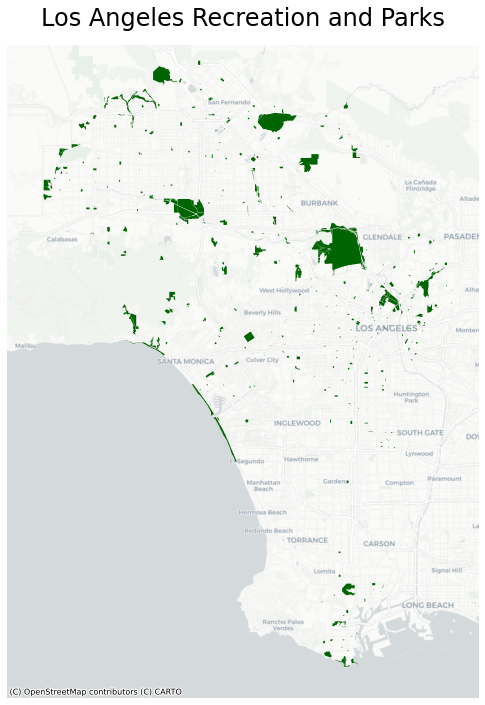

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen"
                   )

# turn the axis off but set custom axes
ax.axis('off')
ax.set_ylim([3985000, 4075000])
ax.set_xlim([-13215000, -13150000])

# set a title
ax.set_title('Los Angeles Recreation and Parks',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Wow! Exciting. It's easy to pick out Griffith Park in this map. I'm surprised by the cluster of parks near the Port of LA and Wilmington. There are very tiny pockets of green parks in Downtown, South LA, and the San Fernando Valley. This is not a surprise that these areas are underserved.

### Sorting by council districts
Next, I want to think about a way that I can group this data so that it could be useful for understanding the spread. Since the data is already separated by city council (variable: cd_real), I'll look at the data by city council district. This categorization of parks by council district is useful for us as urban planners because  decisions about parks are political decisions. Being able to appeal to policymakers is an important tool for urban planners so that we consider who has decision making power in a space.

In [29]:
# create counts of parks by council district
# name that column 'count'
# sort the council district so it starts at 01 and goes to 15, 99 is N/A
parks_by_council = parks.value_counts('cd_real').reset_index(name='Count').sort_values(by='cd_real',ascending = True)
parks_by_council

cd_real  Count
2       01     49
9       02     33
14      03     21
5       04     41
10      05     28
11      06     28
6       07     38
12      08     26
8       09     34
13      10     24
1       11     50
4       12     47
7       13     35
0       14     54
3       15     49
15      99      4

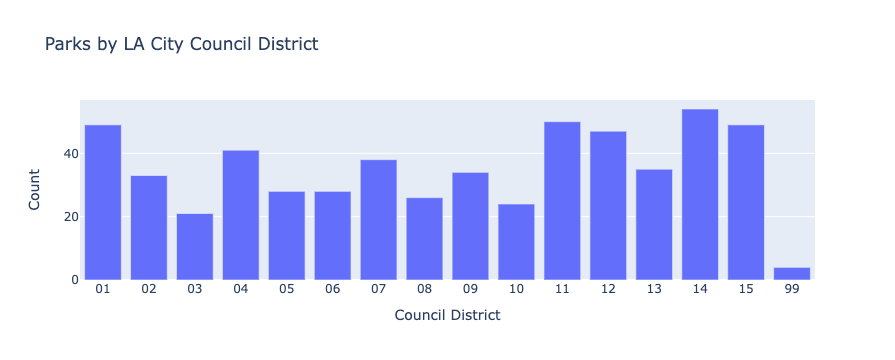

In [30]:
fig = px.bar(parks_by_council,
             x='cd_real',
             y='Count',
             title='Parks by LA City Council District',     
             labels={
        'cd_real':'Council District', 
        'name':'Number of Parks'
    })
fig.show()

## Section 3: Let's put it all together!

Let's look at lowest median income census tracts and their parks.

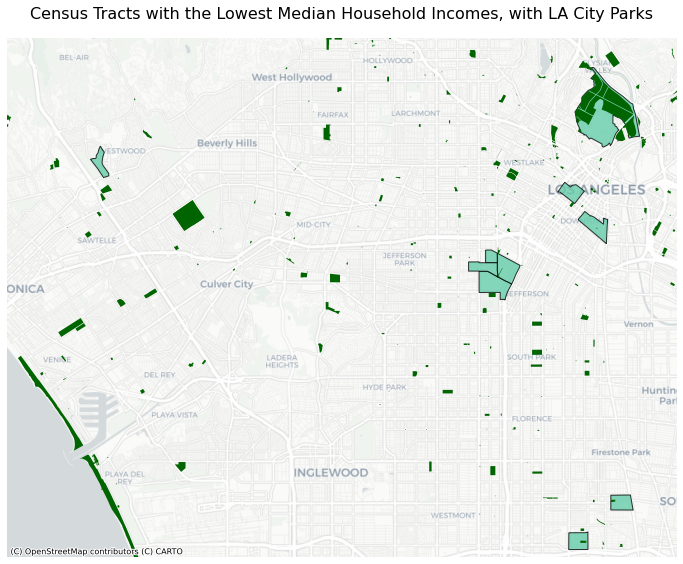

In [31]:
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                  color="mediumaquamarine",
                  alpha=0.8,
                    edgecolor="black"
                 )

# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen",
                    alpha=1
                   )

# turn the axis off, but set limits to zoom into a certain portion of the map
ax.axis('off')
ax.set_ylim([4019000, 4043000])
ax.set_xlim([-13190000, -13159000])

# set a title
ax.set_title('Census Tracts with the Lowest Median Household Incomes, with LA City Parks',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

Wow! Besides Dodger Stadium/Elysian Park, there's very few green space in these census tracts! Next, let's look at the highest median income census tracts and their parks.

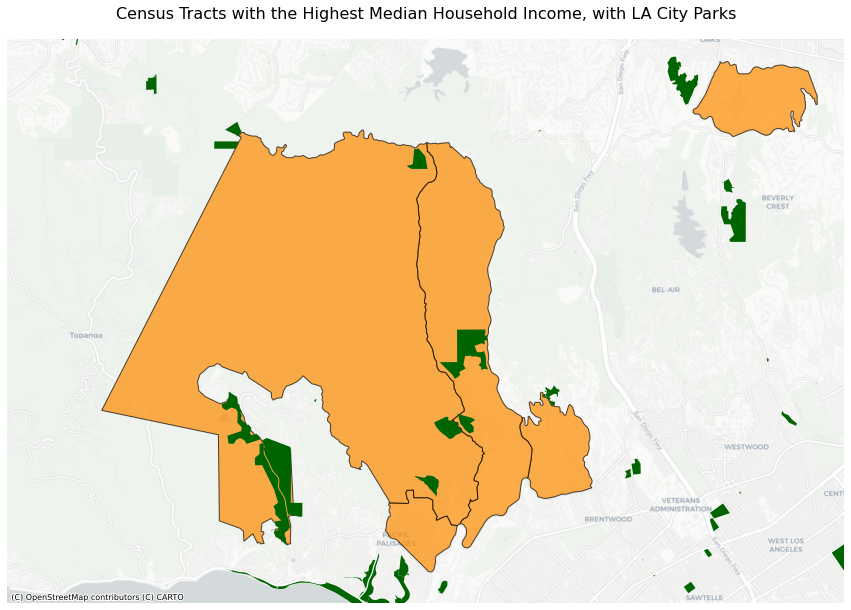

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_merc.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )
# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen",
                    alpha=1
                   )

# turn the axis off, but set limits to zoom into a certain portion of the map
ax.axis('off')
ax.set_ylim([4033500, 4049000])
ax.set_xlim([-13205000, -13182000])

# set a title
ax.set_title('Census Tracts with the Highest Median Household Income, with LA City Parks',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

Let's put them all together!

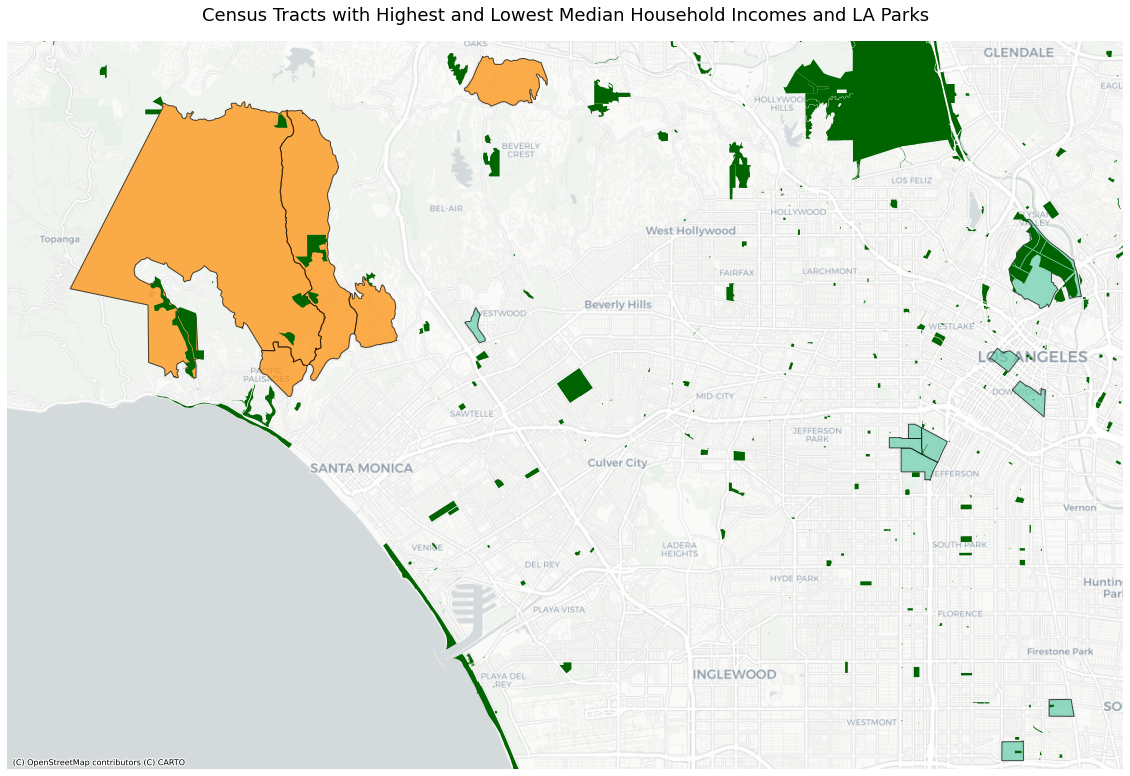

In [33]:
fig, ax = plt.subplots(figsize=(20,20))

# add the layer with ax=ax in the argument 
hhinc_merc.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )
# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                  color="mediumaquamarine",
                  alpha=0.7,
                    edgecolor="black"
                 )

# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen",
                    alpha=1
                   )

# turn the axis off, but set limits to zoom into a certain portion of the map
ax.axis('off')
ax.set_ylim([4019000, 4049000])
ax.set_xlim([-13205000, -13159000])

# set a title
ax.set_title('Census Tracts with Highest and Lowest Median Household Incomes and LA Parks',fontsize=18,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

## Section 4: How many parks in each neighborhood?
I want to get a sense of how many parks are each neighborhood. We'll use neighborhood data from LA County's Open Data Portal.

In [34]:
# bring in neighborhood data
neighborhoods = gpd.read_file("https://data.lacounty.gov/api/geospatial/g4rb-en2z?method=export&format=GeoJSON")

<AxesSubplot:>

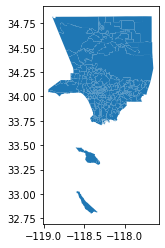

In [35]:
# take a more general look at the data
neighborhoods.plot()

In [36]:
# join the parks data with this neighborhood data
parks_by_neighborhood = gpd.sjoin(neighborhoods, parks) #Spatial join
parks_by_neighborhood

community   source                          label city_type  \
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
..               ...      ...                            ...       ...   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
347             None      BOS                City of Burbank      City   

    objectid_left        lcity      shape_stlength        shape_starea  \
2              95  Los Angeles  21077.385705038188   20898421.74609375   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
..            ...          ...                 ...                 ...   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
347            12      Burbank  102151.39667725106   483502845.6328125   

                                              geometry  index_right  ...  \
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...          197  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...           39  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...           50  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...          163  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...          370  ...   
..                                                 ...          ...  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          209  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...           56  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          541  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          339  ...   
347  MULTIPOLYGON (((-118.30780 34.16116, -118.3080...          392  ...   

    park_id                         name_alpha     shape_leng      area_acres  \
2       730        NORMANDIE RECREATION CENTER  1575.55772808   3.27155060469   
4       650                  BEVERLY GLEN PARK  11696.4216578   85.7365179931   
4       170                     BRIARWOOD PARK  3615.59298078   10.7528414931   
4       993                 LAUREL CANYON PARK  4249.12451012   23.4448373836   
4       994             LAUREL CANYON DOG PARK  1867.49596557   3.93713736085   
..      ...                                ...            ...             ...   
346     514  ORCUTT RANCH HORTICULTURAL CENTER  4861.94095708   24.0958827354   
346     755                         CHASE PARK  2071.63332519   5.96554681766   
346    1096                     FALLBROOK PARK  451.020804868  0.298586515384   
346     202               CHATSWORTH OAKS PARK  1621.82348325   2.90304945512   
347     282                   BUENA VISTA PARK   6974.5619155   8.71039672028   

    issubpark region                                            address  \
2           N      M                     1550 S Normandie Ave, LA 90006   
4           N      W                         2448 N Angelo Dr, LA 90077   
4           N      W                         461 N Almaden Ct, LA 90077   
4           N      V                     8260 W

In [37]:
# count the number of records per community
park_counts = parks_by_neighborhood.value_counts('community').reset_index(name='park_count')
park_counts

community  park_count
0          San Pedro          23
1          Los Feliz          21
2             Encino          18
3         West Hills          17
4             Venice          16
..               ...         ...
118     Reseda Ranch           1
119  Reynier Village           1
120     Shadow Hills           1
121  St Elmo Village           1
122         Mid-city           1

[123 rows x 2 columns]

In [38]:
# add the count to the neighborhood dataframe
neighborhoods = neighborhoods.merge(park_counts, how='left', on='community')
neighborhoods.sample(5)

community   source                            label       city_type  \
230   Playa Del Rey  LA City      Los Angeles - Playa Del Rey            City   
303   Victoria Park  LA City      Los Angeles - Victoria Park            City   
63   Elizabeth Lake      BOS  Unincorporated - Elizabeth Lake  Unincorporated   
298            None      BOS           City of West Hollywood            City   
46         Wiseburn      BOS        Unincorporated - Wiseburn  Unincorporated   

    objectid           lcity      shape_stlength        shape_starea  \
230      133     Los Angeles  31018.784498770827  18667481.974609375   
303      170     Los Angeles  16048.682029533753  11235374.522460938   
63       257  Unincorporated  100368.44376269064  248389615.94433594   
298      219  West Hollywood  57010.575220779407  52835243.752929688   
46       340  Unincorporated  18245.990615112318  12904383.174804688   

                                              geometry  park_count  
230  MULTIPOLYGON (((-118.44043 33.96685, -118.4427...         4.0  
303  MULTIPOLYGON (((-118.31759 34.04717, -118.3176...         1.0  
63   MULTIPOLYGON (((-118.32964 34.66269, -118.3298...         NaN  
298  MULTIPOLYGON (((-118.34340 34.09433, -118.3434...         NaN  
46   MULTIPOLYGON (((-118.37001 33.91631, -118.3700...         NaN

<AxesSubplot:>

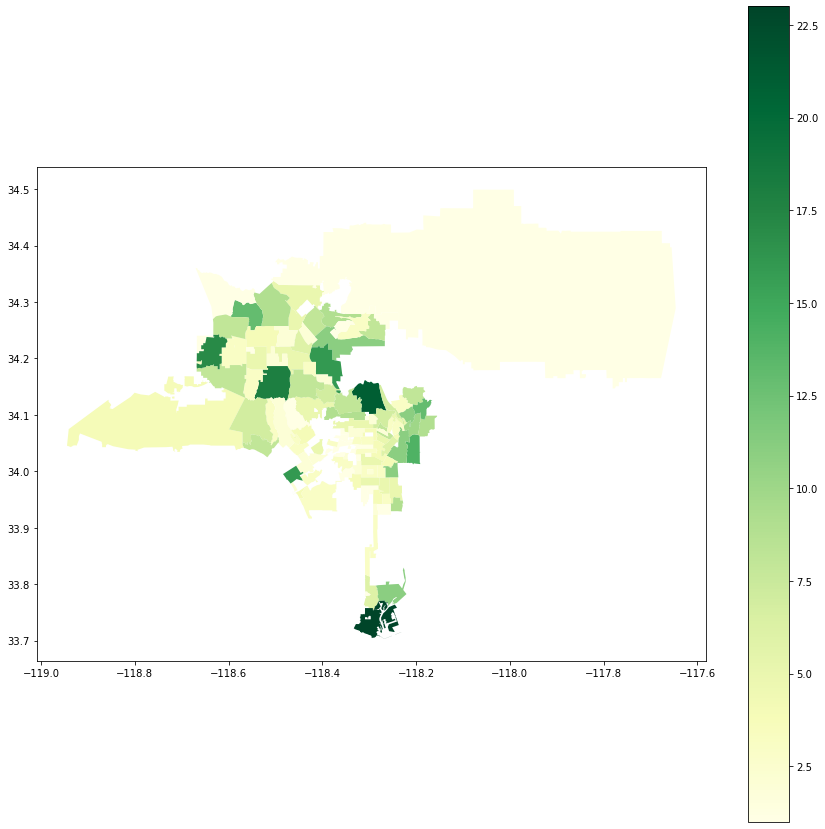

In [39]:
# choropleth map of parks by neighborhoods
fig,ax = plt.subplots(figsize=(15,15))

neighborhoods.plot(ax=ax,
                   column='park_count',
                   legend=True,
                   cmap='YlGn'
                  )


From the above maps and analysis, it's clear that LA is a relatively park poor city. There's unevenness across the city in terms of provision. A closer at individual parks and their amenities would add another layer of complexity to our research question, which we may look at for the final.

## Group Members - The Park (Power) Rangers
This notebook (1 of 2) was put together by Carolyn Chu.

Carolyn, the Pink Ranger, analyzed Census income data and parks data to create a histogram, a bar chart, and static maps. Leslie, the Orange Ranger, analyzed Census race data and parks data to create stacked bar charts and an interactive map. We worked on the presentation jointly.